# Credits: [data](https://www.kaggle.com/datasets/dem0nking/league-of-legends-champions-dataset?resource=download) 



# League of Legends: What is this?

League of Legends (LoL) is a session-based **MOBA** (Multiplayer Online Battle Arena). To understand the data behind the champions, it is essential to understand the core pillars of the gameplay.

## 1. The Core Objective
Two teams of five players compete to destroy the enemy's **Nexus**, a core structure located at the heart of the opponent's base. To reach the Nexus, teams must push through three lanes (Top, Mid, Bottom) protected by defensive structures called **Turrets**.

## 2. Champion Roles and Archetypes

* **Tanks & Bruisers (The Frontline):** These champions have high **Base Health** and **Base Armor**. Their job is to soak up damage and protect their teammates. (Found in our *Teal Cluster*).
* **Mages & Enchanters (The Backline):** These champions rely on casting spells. They have high **Base Mana** but very low defensive stats. (Found in our *Yellow Cluster*).
* **Specialists:** Some champions use unique resources like **Energy** or **Fury** instead of Mana. These champions often break traditional stat patterns. (Found in our *Purple/Outlier Cluster*).

## 3. The Importance of Base Stats
In Data Science terms, a champion's "Level 1" stats are the foundation of their power.
* **Base Health & Armor:** Determines "Effective HP"—how much physical punishment a champion can take before dying.
* **Base Attack Damage (AD):** Determines the strength of basic attacks, crucial for "last-hitting" minions to gain gold.
* **Base Mana:** Limits how many abilities a champion can use before needing to return to base.
* **Gold Efficiency:** A mathematical ratio comparing the value of a champion's raw stats to the cost of items in the shop.

## 4. The Economy (Gold & Items)
Players earn gold by killing minions, monsters, and enemy players. This gold is spent on **Items** that multiply the base stats we analyzed. 
> **Data Insight:** A champion with high *Gold Efficiency* starts the game with a "math advantage," meaning they are naturally stronger even without expensive items.

---

# League of Legends Dataset:

| Label | Description |
| :--- | :--- |
| **Champion Name** | The name of the character. This is a unique identifier (string) used for labeling results but is excluded from numerical calculations. |
| **Role** | The intended gameplay position (e.g., Mid, Support, ADC).
| **Base Health** | The starting HP (Hit Points) of the champion. Higher values typically represent "Tanks" or "Bruisers" designed for the frontline. |
| **Base Mana** | The resource used for casting spells. Some champions have energy instead of Mana |
| **Base Armor** | The champion's physical defense. Higher values are reserved for Tanks |
| **Base Attack Damage** | The power of the champion's basic attacks at level 1. High values are characteristic of "Marksmen" (ADCs) or "Assassins." |
| **Gold Efficiency** | A calculated ratio representing the value of the champion's base stats relative to their gold cost.  |

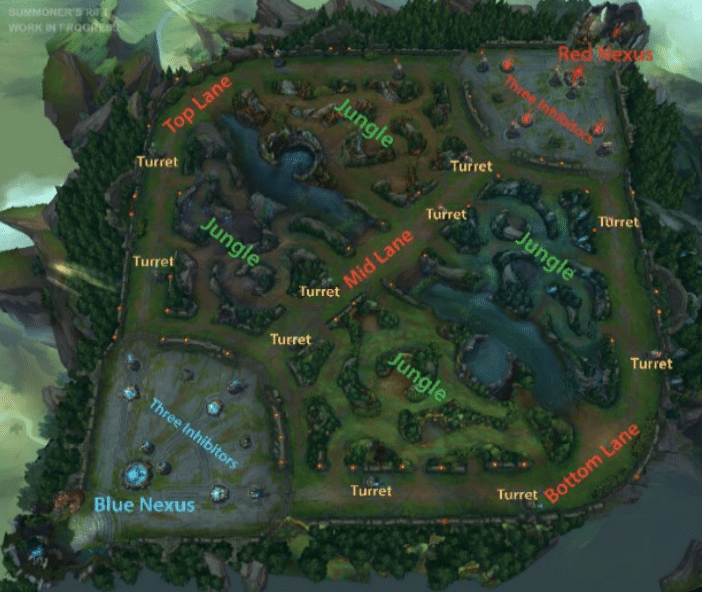

In [44]:
import pandas as pd

lol_data = pd.read_csv('../../champions.csv')

display(lol_data)

,Champion Name,Role,Base Health,Base Mana,Base Armor,Base Attack Damage,Gold Efficiency
0,Aatrox,Top,580,0,38,60,1.05
1,Ahri,Mid,526,418,21,53,1.02
2,Akali,Mid,575,200,23,62,1.03
3,Alistar,Support,600,350,44,62,1.08
4,Amumu,Jungle,615,285,33,53,1.06
...,...,...,...,...,...,...,...
144,Zed,Mid,585,200,32,63,1.05
145,Ziggs,Mid,536,480,21,54,1.02
146,Zilean,Support,504,452,22,51,1.01
147,Zoe,Mid,560,425,20,58,1.02


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Base Health', 'Base Mana', 'Base Armor', 'Base Attack Damage', 'Gold Efficiency'] #selecting only numerical values for clustering
X = lol_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### Data Preparation:

Before applying the **K-Means** algorithm, the raw dataset underwent two essential preprocessing steps:

1. **Feature Selection**: 
   - I extracted only the **numerical columns** (`Base Health`, `Base Mana`, etc.). 
   - Non-numerical data, such as `Champion Name` and `Role`, were excluded from the calculation because K-Means relies on mathematical distances which cannot be computed using text.

2. **Standardization (Scaling)**: 
   - I applied `StandardScaler` to normalize the data. 
   - Because raw stats have different scales (e.g., Health ~600 vs. Gold Efficiency ~1). Without scaling, the algorithm would mistakenly treat Health as 600x more important than Gold Efficiency. 

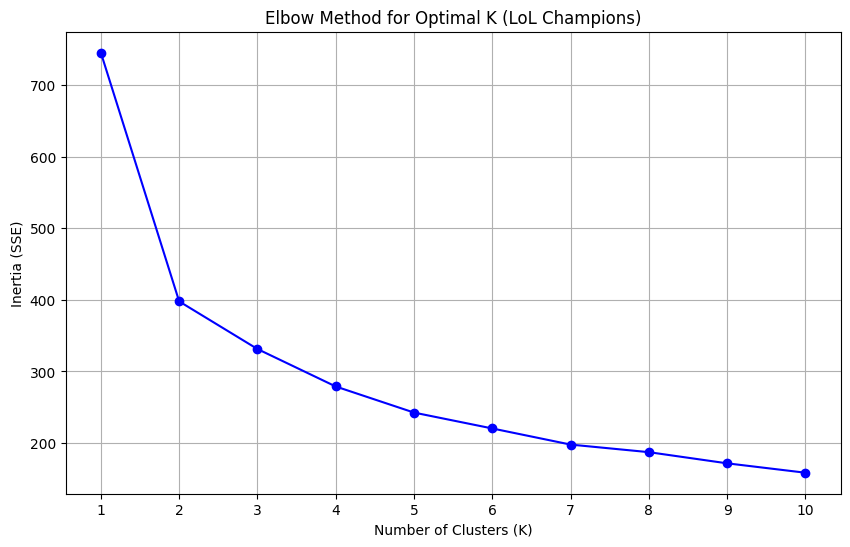

In [46]:
import matplotlib.pyplot as plt


sse = [] #sum of squared errors

# Testing number of clusters from 1 to 10
k_range = range(1, 11)

for k in k_range:
    # Initializing KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Append inertia (SSE) to our list
    sse.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K (LoL Champions)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Determining Optimal K via the Elbow Method

To find the most suitable number of clusters for League of Legends dataset, I calculated the **Sum of Squared Errors (SSE)** for $K$ values ranging from 1 to 10. 

- **Inertia (SSE)**: A lower value indicates that data points are closer to their respective centroids.
- **The "Elbow"**: I look for the point on the graph where the rate of decrease shifts from rapid to slow.

The point (number of clusters) I choose is *4*.

In [47]:
# 1. Initialize and fit the model with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
lol_data['Cluster'] = kmeans.fit_transform(X_scaled).argmax(axis=1)

# 2. View the results
comparison = lol_data[['Champion Name', 'Role', 'Cluster']].sort_values(by='Cluster')
print(comparison)

print(comparison['Cluster'].value_counts())


    Champion Name     Role  Cluster
2           Akali      Mid        0
33           Gnar      Top        0
55         Kennen      Top        0
132      Vladimir      Mid        0
13          Braum  Support        1
..            ...      ...      ...
142         Yuumi  Support        2
145         Ziggs      Mid        2
146        Zilean  Support        2
147           Zoe      Mid        2
148          Zyra  Support        2

[149 rows x 3 columns]
Cluster
1    77
2    68
0     4
Name: count, dtype: int64


After running the K-Means algorithm (K=4), we compared the mathematical clusters to the assigned game roles. Here are the key findings:

#### 1. Cluster Profiles
* **Cluster 0 (Specialist/Manaless):** Contains only 4 champions (Akali, Gnar, Kennen, Vladimir). These are "outliers" characterized by having **0 Base Mana** or unique resource systems. 
* **Cluster 1 (Frontline/Durable):** The largest group (77 champions). This cluster includes most Tanks and Fighters (like Braum). It represents champions with higher base defensive stats.
* **Cluster 2 (Squishy Casters/Utility):** A group of 68 champions including both Mages (Zoe, Ziggs) and Enchanter Supports (e.g. Yuumi). 

* **Stats vs. Roles**: The algorithm grouped **Mids and Supports** together in Cluster 2. 
* **The "Manaless" Bias**: The small size of Cluster 0 suggests that the `Base Mana` feature is a very strong differentiator. 

### Analysis of Cluster 0 and the "Energy" Issue

Upon closer inspection of **Cluster 0**, we can observe an interesting behavior regarding champions like Akali, Kennen, or Zed:

1. **Energy vs. Mana**: Although these champions are "manaless" in gameplay terms, they often have a base value of **200 (Energy)** in the data column typically reserved for Mana. 
2. **Mathematical Distance**: Because the algorithm sees a value of `200` for Energy and `0` for true manaless champions (like Gnar or Vladimir), it perceives a significant mathematical distance between them.
3. **The "Zed Case"**: You might notice Zed is missing from Cluster 0 despite using energy. This occurs because K-Means considers **all features simultaneously**. If Zed's other stats (like Base Attack Damage or Armor) are closer to the "Assassin/ADC" group (Cluster 1 or 2), the algorithm will prioritize those similarities over the fact that he shares a resource value with Akali.


In [48]:
print(lol_data[lol_data['Champion Name'].isin(['Zed', 'Akali'])][features])
print("------")
print(lol_data[lol_data['Champion Name'].isin(['Gnar', 'Akali'])][features])

     Base Health  Base Mana  Base Armor  Base Attack Damage  Gold Efficiency
2            575        200          23                  62             1.03
144          585        200          32                  63             1.05
------
    Base Health  Base Mana  Base Armor  Base Attack Damage  Gold Efficiency
2           575        200          23                  62             1.03
33          510        100          32                  59             1.03


#### Evidence from Raw Data:
Comparing the raw stats, we see that:
- **Akali vs. Zed**: While both share 200 Energy, Zed has significantly higher **Base Armor (32 vs 23)**. This physical durability pushes Zed toward the "Fighter/Tank" cluster (Cluster 1).
- **Gnar vs. Akali**: Akali has 200 energy while Gnar has 100 energy. They have the same gold efficiency and almost the same base attack damage. 

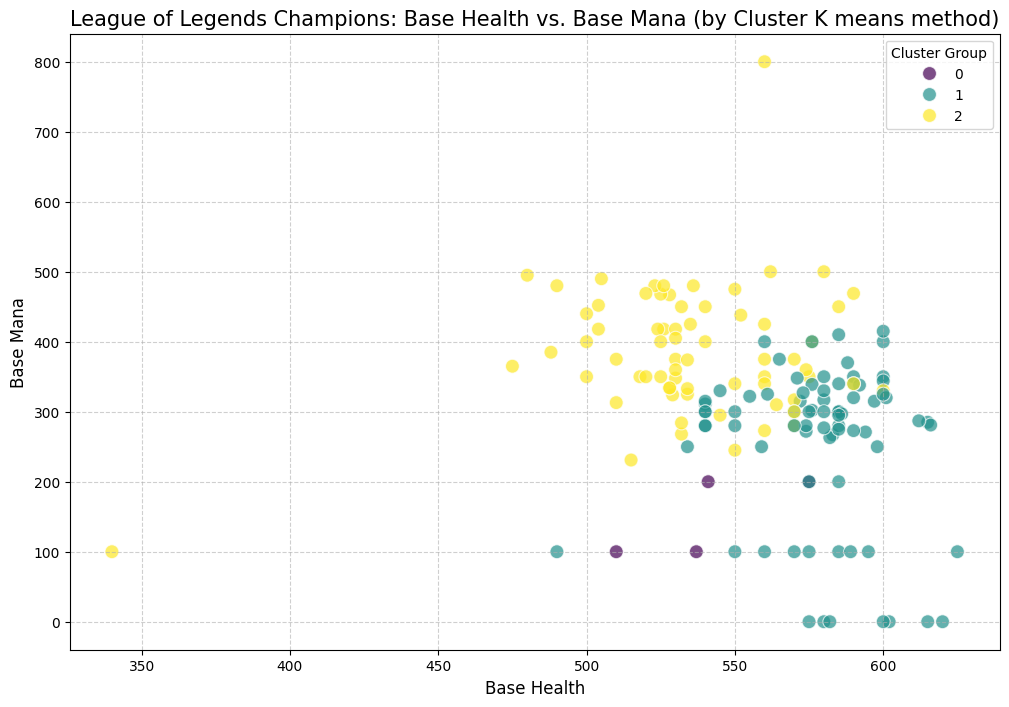

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=lol_data, 
    x='Base Health', 
    y='Base Mana', 
    hue='Cluster', 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

plt.title('League of Legends Champions: Base Health vs. Base Mana (by Cluster K means method)', fontsize=15)
plt.xlabel('Base Health', fontsize=12)
plt.ylabel('Base Mana', fontsize=12)
plt.legend(title='Cluster Group')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Another interesting method which might be used is PCA.


*PCA* is Principal Component Analysis. This is technique used to simplify complex datasets by reducing their dimensionality while preserving as much of the important information as possible

My dataset has 5 features so its dimension is 5. PCA will simply help me to "squeeze" those 5 dimensions into less principal components that best capture the differences between champions

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2) #reduce to 2 dimensions

pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = lol_data['Cluster'].values
pca_df['Champion Name'] = lol_data['Champion Name'].values

variance = pca.explained_variance_ratio_ #variance tells how much of the total 5d info is kept in 2d
print(f"PC1 explains {variance[0]:.2%} of the variance.")
print(f"PC2 explains {variance[1]:.2%} of the variance.")
print(f"Total info preserved: {sum(variance):.2%}")



display(pca_df)

PC1 explains 61.83% of the variance.
PC2 explains 15.66% of the variance.
Total info preserved: 77.49%


,PCA1,PCA2,Cluster,Champion Name
0,1.890295,-1.770915,1,Aatrox
1,-2.352280,0.116365,2,Ahri
2,-0.124336,-0.721861,0,Akali
3,2.550784,1.201661,1,Alistar
4,0.849792,0.752141,1,Amumu
...,...,...,...,...
144,1.228318,-0.372190,1,Zed
145,-2.331641,0.674760,2,Ziggs
146,-3.030884,0.008326,2,Zilean
147,-1.681080,0.574878,2,Zoe


The PCA transformation compressed 5-dimensional champion statistics into a 2-dimensional space while retaining 77.49% of the original variance.

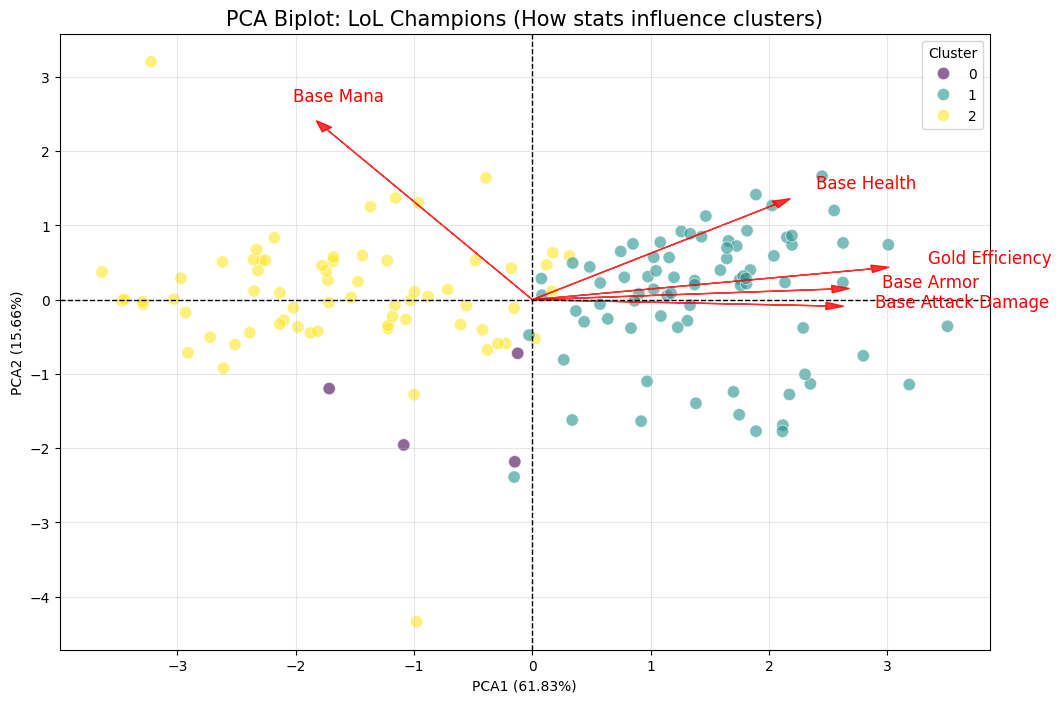

In [ ]:
import seaborn as sns


plt.figure(figsize=(12, 8))

# Scatter plot of the champions
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=80, alpha=0.6)

# Draw arrows (Loadings)
# These show which way Health, Mana.
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='red', alpha=0.8, head_width=0.1)
    plt.text(loadings[i, 0]*3.5, loadings[i, 1]*3.5, feature, color='red', fontsize=12)

plt.title('PCA Biplot: LoL Champions (How stats influence clusters)', fontsize=15)
plt.xlabel(f'PCA1 ({variance[0]:.2%})')
plt.ylabel(f'PCA2 ({variance[1]:.2%})')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.show()

The PCA Biplot reveals that Physical Durability (PCA1) is the primary factor distinguishing League of Legends champions, followed by Resource Capacity (PCA2). While game roles (Mid, Support) vary, the statistical 'archetypes' are clearly defined by the trade-off between Mana and defensive stats. Cluster 0 represents a distinct niche of specialists who break the traditional Mana-for-Durability trade-off.

### Interpreting the Biplot Vectors
The red arrows (vectors) indicate the influence of the original features on the principal components:
- **PC1 (X-axis)** is strongly influenced by **Base Health, Armor, and AD**. This axis separates "Frontline" champions from "Backline" champions.
- **PC2 (Y-axis)** is dominated by **Base Mana**. It separates traditional spellcasters from manaless or energy-based champions.
- **Cluster separation**: The Teal cluster (Cluster 1) aligns with high durability stats, while the Yellow cluster (Cluster 2) aligns with high mana. The Purple cluster (Cluster 0) represents champions who sit outside the typical Mana-for-Durability trade-off.